# Car prediction #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset 
df = pd.read_csv("car data.csv")

In [ ]:
# display the dataset
# df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# describe the dataset
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
# Total number of missing value
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

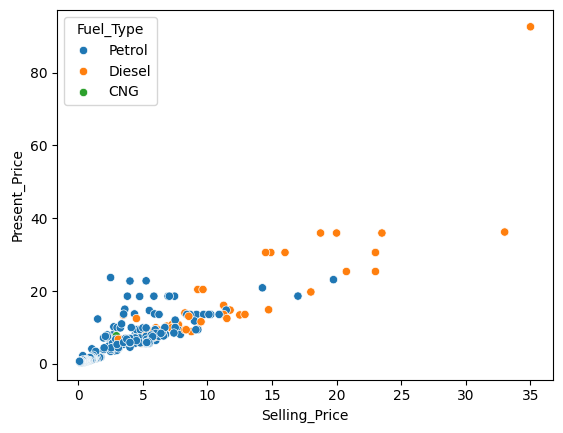

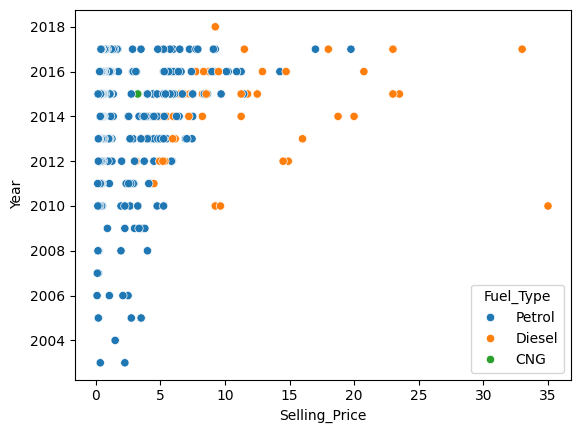

In [6]:
# Scatterplot for Selling Price vs Present Price
sns.scatterplot(x='Selling_Price',y='Present_Price',data=df,hue='Fuel_Type')
plt.show()



# Scatterplot for Selling Price vs Year
sns.scatterplot(x='Selling_Price',y='Year',data=df,hue='Fuel_Type')
plt.show()

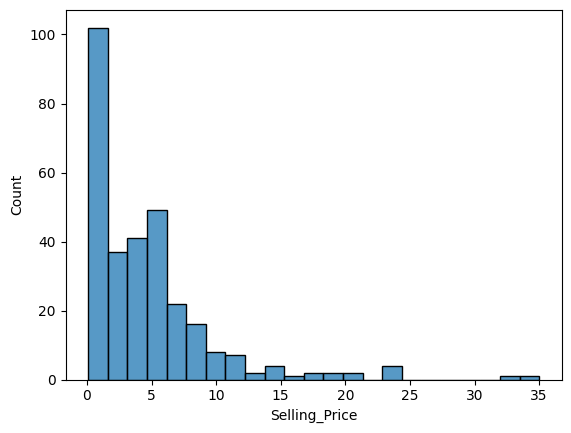

In [7]:
#  Histogram of car prices
sns.histplot(df['Selling_Price']) #  'price' is the target variable column
plt.show()

In [8]:
# Encoding dataset
from sklearn.preprocessing import LabelEncoder
what_to_encode = ['Transmission','Selling_type','Fuel_Type',
                        'Car_Name',]
encoder = LabelEncoder()
for col in what_to_encode:
    df[col] =encoder.fit_transform(df[col])

print('..................Encoding COlumns..............')
df.head(10)

..................Encoding COlumns..............


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0
5,95,2018,9.25,9.83,2071,1,0,1,0
6,68,2015,6.75,8.12,18796,2,0,1,0
7,91,2015,6.50,8.61,33429,1,0,1,0
8,68,2016,8.75,8.89,20273,1,0,1,0
9,68,2015,7.45,8.92,42367,1,0,1,0


In [9]:
# Features Variable
X = df.drop(columns = 'Selling_Price', axis=1)
y = df['Selling_Price']

In [10]:

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

R-squared: 0.8464540623822294
Mean Absolute Error: 1.214732989653563
